In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras
import matplotlib.pyplot as plt

***Connect to the database***

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "Nabila12345@",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database"),
        return self.connection

### Q8: What season(quarter) is the worst for each product item?

In [3]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = " SELECT tim.quarter,i.item_name , SUM(f.quantity)" \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.item_dim i on i.item_key=f.item_key " \
              "JOIN ecomdb_star_schema.time_dim tim on tim.time_key=f.time_key " \
              " GROUP BY (tim.quarter,i.item_name) "\
              "ORDER BY i.item_name"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('Q1', '100% Juice Box Variety 6.75 oz ', 5698),
 ('Q2', '100% Juice Box Variety 6.75 oz ', 5876),
 ('Q3', '100% Juice Box Variety 6.75 oz ', 6045),
 ('Q4', '100% Juice Box Variety 6.75 oz ', 5806),
 ('Q1', 'A&W Root Beer - 12 oz cans', 5965),
 ('Q2', 'A&W Root Beer - 12 oz cans', 5735),
 ('Q3', 'A&W Root Beer - 12 oz cans', 6103),
 ('Q4', 'A&W Root Beer - 12 oz cans', 5820),
 ('Q1', 'A&W Root Beer Diet - 12 oz cans', 6026),
 ('Q2', 'A&W Root Beer Diet - 12 oz cans', 5627),
 ('Q3', 'A&W Root Beer Diet - 12 oz cans', 5940),
 ('Q4', 'A&W Root Beer Diet - 12 oz cans', 5589),
 ('Q1', 'Advil 2 pill packets', 5453),
 ('Q2', 'Advil 2 pill packets', 6001),
 ('Q3', 'Advil 2 pill packets', 5647),
 ('Q4', 'Advil 2 pill packets', 6025),
 ('Q1', 'All Purpose Cleaner 409 Spray', 5325),
 ('Q2', 'All Purpose Cleaner 409 Spray', 5375),
 ('Q3', 'All Purpose Cleaner 409 Spray', 5764),
 ('Q4', 'All Purpose Cleaner 409 Spray', 5890),
 ('Q1', 'Altoids Small Packs Variety', 5730),
 ('Q2', 'Altoids Small Pac

In [4]:
df = pd.DataFrame(list(records), columns=['Quarter', 'Item_name' ,'Quantity'])
df

,Quarter,Item_name,Quantity
0,Q1,100% Juice Box Variety 6.75 oz,5698
1,Q2,100% Juice Box Variety 6.75 oz,5876
2,Q3,100% Juice Box Variety 6.75 oz,6045
3,Q4,100% Juice Box Variety 6.75 oz,5806
4,Q1,A&W Root Beer - 12 oz cans,5965
...,...,...,...
1031,Q4,Yoplait Original Yogurt Variety Pack,5737
1032,Q1,Zoo Animal Cookies/Crackers,5462
1033,Q2,Zoo Animal Cookies/Crackers,5508
1034,Q3,Zoo Animal Cookies/Crackers,5701


In [11]:
df2=df.iloc[0:30]
df2

,Quarter,Item_name,Quantity
0,Q1,100% Juice Box Variety 6.75 oz,5698
1,Q2,100% Juice Box Variety 6.75 oz,5876
2,Q3,100% Juice Box Variety 6.75 oz,6045
3,Q4,100% Juice Box Variety 6.75 oz,5806
4,Q1,A&W Root Beer - 12 oz cans,5965
5,Q2,A&W Root Beer - 12 oz cans,5735
6,Q3,A&W Root Beer - 12 oz cans,6103
7,Q4,A&W Root Beer - 12 oz cans,5820
8,Q1,A&W Root Beer Diet - 12 oz cans,6026
9,Q2,A&W Root Beer Diet - 12 oz cans,5627


In [43]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = '''Select  t.item_name,t.quarter,MIN(t.Total)
                    from (Select tim.quarter, i.item_name, SUM(f.quantity) as Total
                    From ecomdb_star_schema.fact_table f
                    JOIN ecomdb_star_schema.item_dim i on i.item_key=f.item_key
                    JOIN ecomdb_star_schema.time_dim tim on tim.time_key=f.time_key
                    GROUP BY (tim.quarter,i.item_name)
                    ORDER BY (tim.quarter)) t
                GROUP BY (t.quarter,t.item_name)
                ORDER BY quarter'''
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('100% Juice Box Variety 6.75 oz ', 'Q1', 5698),
 ('A&W Root Beer - 12 oz cans', 'Q1', 5965),
 ('A&W Root Beer Diet - 12 oz cans', 'Q1', 6026),
 ('Advil 2 pill packets', 'Q1', 5453),
 ('All Purpose Cleaner 409 Spray', 'Q1', 5325),
 ('Altoids Small Packs Variety', 'Q1', 5730),
 ('Apple Sauce Variety GoGO Squeeze 3.2oz', 'Q1', 5666),
 ('AquaFina Purified Drinking Water 16oz', 'Q1', 5299),
 ('Austin Cookie Cracker Variety', 'Q1', 5597),
 ('Austin Toasty Crackers w/ PBtr', 'Q1', 5621),
 ('Baked Chips Variety Mix Frito', 'Q1', 5740),
 ("Barq's Root Beer - 12 oz cans", 'Q1', 5722),
 ('Belvita Hard Biscuits Blueberry', 'Q1', 5496),
 ('Belvita Hard Biscuits Cinnamon', 'Q1', 5700),
 ('Belvita Protein Oats Soft Biscuit', 'Q1', 5774),
 ('Blue Diamond Almonds Rstd, Sltd', 'Q1', 5765),
 ('Bounty Paper Towels Select a Size ', 'Q1', 5678),
 ('Breath Savers Peppermints 12/roll ', 'Q1', 5600),
 ('Brisk Lemon Iced Tea - 12 oz cans', 'Q1', 5937),
 ('Cascade Gel Packs Dishwasher', 'Q1', 6032),
 ('Cascade

In [44]:
df2 = pd.DataFrame(list(records), columns=['Item_name', 'Quarter' ,'Worst Values'])
df2

,Item_name,Quarter,Worst Values
0,100% Juice Box Variety 6.75 oz,Q1,5698
1,A&W Root Beer - 12 oz cans,Q1,5965
2,A&W Root Beer Diet - 12 oz cans,Q1,6026
3,Advil 2 pill packets,Q1,5453
4,All Purpose Cleaner 409 Spray,Q1,5325
...,...,...,...
1031,Welch's 100% Juice Variety10 oz,Q4,5541
1032,Wint O Green LifeSavers Sugar Free,Q4,5823
1033,Wonderful Pistachios (in shell),Q4,5843
1034,Yoplait Original Yogurt Variety Pack,Q4,5737


In [56]:
id_vars= ['Item_name']
df_min = df2.groupby(id_vars)['Worst Values'].min()
#df = df2.merge(df_min, how='left',on=id_vars)
df_min

Item_name
100% Juice Box Variety 6.75 oz           5698
A&W Root Beer - 12 oz cans               5735
A&W Root Beer Diet - 12 oz cans          5589
Advil 2 pill packets                     5453
All Purpose Cleaner 409 Spray            5325
                                         ... 
Welch's 100% Juice Variety10 oz          5494
Wint O Green LifeSavers Sugar Free       5323
Wonderful Pistachios (in shell)          5578
Yoplait Original Yogurt Variety Pack     5426
Zoo Animal Cookies/Crackers              5462
Name: Worst Values, Length: 259, dtype: int64

In [51]:
a=df_min.to_frame()
a

,Worst Values
Item_name,
100% Juice Box Variety 6.75 oz,5698
A&W Root Beer - 12 oz cans,5735
A&W Root Beer Diet - 12 oz cans,5589
Advil 2 pill packets,5453
All Purpose Cleaner 409 Spray,5325
...,...
Welch's 100% Juice Variety10 oz,5494
Wint O Green LifeSavers Sugar Free,5323
Wonderful Pistachios (in shell),5578


In [ ]:
id_vars= ['Item_name']
df_min = df2.groupby(id_vars)['Worst Values'].min()
#df = df2.merge(df_min, how='left',on=id_vars)
df_min

In [22]:
df_min.to_frame()

,Worst Values
Item_name,
100% Juice Box Variety 6.75 oz,5698
A&W Root Beer - 12 oz cans,5735
A&W Root Beer Diet - 12 oz cans,5589
Advil 2 pill packets,5453
All Purpose Cleaner 409 Spray,5325
...,...
Welch's 100% Juice Variety10 oz,5494
Wint O Green LifeSavers Sugar Free,5323
Wonderful Pistachios (in shell),5578


In [14]:
df_min.head(20)

Item_name                        Quarter
100% Juice Box Variety 6.75 oz   Q1         5698
                                 Q2         5876
                                 Q3         6045
                                 Q4         5806
A&W Root Beer - 12 oz cans       Q1         5965
                                 Q2         5735
                                 Q3         6103
                                 Q4         5820
A&W Root Beer Diet - 12 oz cans  Q1         6026
                                 Q2         5627
                                 Q3         5940
                                 Q4         5589
Advil 2 pill packets             Q1         5453
                                 Q2         6001
                                 Q3         5647
                                 Q4         6025
All Purpose Cleaner 409 Spray    Q1         5325
                                 Q2         5375
                                 Q3         5764
                            

In [9]:
df[['Item_name','Quarter','Worst Values']] = df[['Item_name','Quarter','Worst Values']].mask(df['Worst Values'].duplicated()).fillna('')
df

,Item_name,Quarter,Worst Values
0,100% Juice Box Variety 6.75 oz,Q1,5698.0
1,,,
2,,,
3,A&W Root Beer - 12 oz cans,Q1,5965.0
4,A&W Root Beer Diet - 12 oz cans,Q1,6026.0
...,...,...,...
2333,,,
2334,,,
2335,,,
2336,,,


In [10]:
df['Worst Values'] = pd.to_numeric(df['Worst Values'],errors='coerce')

In [11]:
df_copy=df
df_copy

,Item_name,Quarter,Worst Values
0,100% Juice Box Variety 6.75 oz,Q1,5698.0
1,,,NaN
2,,,NaN
3,A&W Root Beer - 12 oz cans,Q1,5965.0
4,A&W Root Beer Diet - 12 oz cans,Q1,6026.0
...,...,...,...
2333,,,NaN
2334,,,NaN
2335,,,NaN
2336,,,NaN


In [12]:
df_copy.iloc[0:20]

,Item_name,Quarter,Worst Values
0,100% Juice Box Variety 6.75 oz,Q1,5698.0
1,,,NaN
2,,,NaN
3,A&W Root Beer - 12 oz cans,Q1,5965.0
4,A&W Root Beer Diet - 12 oz cans,Q1,6026.0
5,,,NaN
6,Advil 2 pill packets,Q1,5453.0
7,,,NaN
8,All Purpose Cleaner 409 Spray,Q1,5325.0
9,,,NaN


In [13]:
df_copy.columns[df.isna().any()]

Index(['Worst Values'], dtype='object')

In [14]:
dfc=df_copy.dropna()
dfc

,Item_name,Quarter,Worst Values
0,100% Juice Box Variety 6.75 oz,Q1,5698.0
3,A&W Root Beer - 12 oz cans,Q1,5965.0
4,A&W Root Beer Diet - 12 oz cans,Q1,6026.0
6,Advil 2 pill packets,Q1,5453.0
8,All Purpose Cleaner 409 Spray,Q1,5325.0
...,...,...,...
2311,Vita Coconut Water 10oz,Q4,5936.0
2316,Waterloo Sparkling Grapefruit 12oz,Q4,5459.0
2322,Waterloo Sparkling Mango 12oz,Q4,5619.0
2323,Waterloo Sparkling Original 12oz,Q4,5520.0


In [15]:
dfc.dtypes

Item_name        object
Quarter          object
Worst Values    float64
dtype: object

In [17]:
dfc1=dfc.iloc[0:10]
dfc1

,Item_name,Quarter,Worst Values
0,100% Juice Box Variety 6.75 oz,Q1,5698.0
3,A&W Root Beer - 12 oz cans,Q1,5965.0
4,A&W Root Beer Diet - 12 oz cans,Q1,6026.0
6,Advil 2 pill packets,Q1,5453.0
8,All Purpose Cleaner 409 Spray,Q1,5325.0
10,Altoids Small Packs Variety,Q1,5730.0
11,Apple Sauce Variety GoGO Squeeze 3.2oz,Q1,5666.0
14,AquaFina Purified Drinking Water 16oz,Q1,5299.0
16,Austin Cookie Cracker Variety,Q1,5597.0
20,Austin Toasty Crackers w/ PBtr,Q1,5621.0


In [18]:
dfc= dfc1.set_index(['Item_name'])

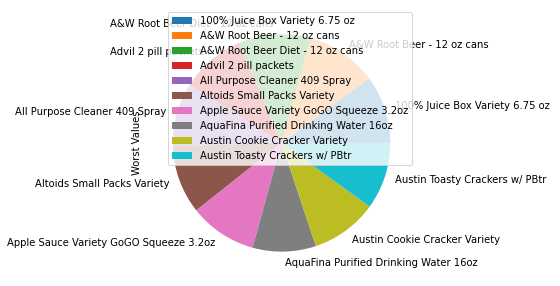

In [19]:
plot = dfc.plot.pie(y='Worst Values', figsize=(5, 5))

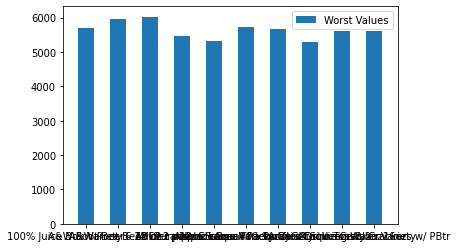

In [20]:
plt.bar(dfc1['Item_name'],dfc1['Worst Values'],width=0.5,label="Worst Values")
plt.legend()

<AxesSubplot:xlabel='Item_name'>

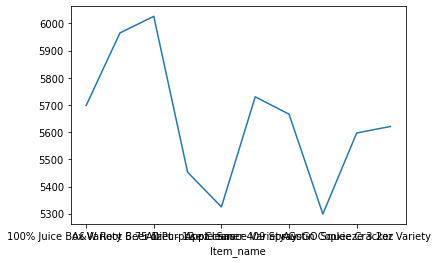

In [21]:
dfc1.set_index('Item_name')['Worst Values'].plot()

In [24]:
dfc2=df.iloc[600:650]
dfc2

,Item_name,Quarter,Worst Values
600,,,NaN
601,,,NaN
602,Austin Cookie Cracker Variety,Q2,5881.0
603,,,NaN
604,Austin Toasty Crackers w/ PBtr,Q2,5274.0
605,Baked Chips Variety Mix Frito,Q2,5431.0
606,,,NaN
607,Barq's Root Beer - 12 oz cans,Q2,5745.0
608,Belvita Hard Biscuits Blueberry,Q2,5565.0
609,,,NaN


In [25]:
dfc3=dfc2.dropna()
dfc3

,Item_name,Quarter,Worst Values
602,Austin Cookie Cracker Variety,Q2,5881.0
604,Austin Toasty Crackers w/ PBtr,Q2,5274.0
605,Baked Chips Variety Mix Frito,Q2,5431.0
607,Barq's Root Beer - 12 oz cans,Q2,5745.0
608,Belvita Hard Biscuits Blueberry,Q2,5565.0
614,Belvita Protein Oats Soft Biscuit,Q2,5726.0
617,"Blue Diamond Almonds Rstd, Sltd",Q2,5932.0
619,Bounty Paper Towels Select a Size,Q2,5898.0
624,Brisk Lemon Iced Tea - 12 oz cans,Q2,5418.0
627,Cascade Gel w/ Dawn Dishwasher,Q2,5930.0


<AxesSubplot:xlabel='Item_name'>

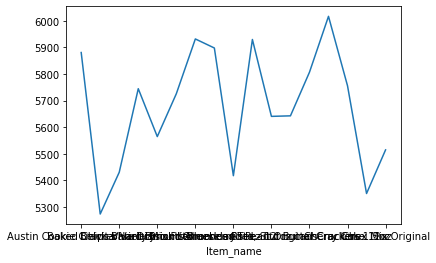

In [27]:
dfc3.set_index('Item_name')['Worst Values'].plot()